threshold, f1 score, aoc

# 모델 성능 평가지표(Metric)

> 실제 데이터의 값과 모델에 의해 예측된 값을 비교하여 모델의 성능을 측정하는 방법

# 회귀 모델 성능 측정

## Linear Regression 학습 및 예측

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = diabetes.data
target = diabetes.target
data.shape, target.shape

((442, 10), (442,))

In [2]:
from sklearn.model_selection import train_test_split
SEED = 42

X_train, X_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)

## 회귀 평가 지표

### R2(결정 계수; Coefficient of Determination)

- 회귀식이 얼마나 정확한지를 나타내는 숫자
- $ 0 =< R^2 <= 1 $

$$
R^2 = { SSR \over SST } = { \sum{(\hat{y}_i - \bar{y} )} \over \sum{(y_i - \bar{y})^2 } } = { 회귀선에 의해 설명되는 변동 \over 전체변동 }
$$

- 기호 설명
  - $ \bar{y} = y 평균값 $
  - $ \hat{y} = y 예측값 $
  - $ y = y 실제값 $

In [6]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, pred)
r2

0.4849058889476754

### MSE(Mean Squared Error)

- 실제값과 예측값의 차이를 제곱한 뒤 평균을 낸 값
- 이상치에 민감함
- 직관적이지 못하다
- 손실 함수로 주로 사용함

$$
MSE = \frac{1}{n}{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}
$$

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid, pred)
mse

2848.3106508475066

### RMSE(Root Mean Squared Error)

- MSE에 루트를 씌운 값
- 여전히 이상치에는 민감함

$$
RMSE = \sqrt{\frac{1}{n}{\sum_{i=1}^n}({y_i} - \hat{y_1})}
$$

In [8]:
import numpy as np
np.sqrt(mse)

53.36956671032197

### MAE(Mean Absolute Error)

- 실제 값과 예측 값의 차이를 절대값으로 변환하여 평균화

$$
MAE = \frac{1}{n}{\sum_{i=1}^{n}|y_i-\hat{y}_i}|
$$

In [9]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid,pred)
mae

41.54850685988061

### MAPE(Mean Absolute Percentage Error)

- 실제 값에 대한 절대 오차 비율의 평균을 퍼센트로 표현
- RSE, RMSE의 단점을 보완함

$$
MAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{y_i}}
$$

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_valid,pred)

0.37310970433744695

### SMAPE(Symmetric Mean Absolute Percentage Error)
- 기존 MAPE의 단점 보완
- MAPE와 다른점은 각 실제값과 예측값을 절대값으로 변경후 합으로 나눈다.
- MAPE와 다르게 실제값에 0이 존재해도 계산이 가능하다.
- 과소추정에 대한 패널티를 줄수가 있다.
$$
SMAPE = \frac{100}{n}{\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{{|y_i|}+|\hat{y_i}|}}
$$

In [11]:
def smape(true,pred):
    error = np.abs(true-pred) / (np.abs(true) + np.abs(pred))
    return np.mean(error)
smape(y_valid,pred)

0.15271405979135066

# 분류 모형 성능 평가

## 혼동행렬(Confusion Matrix)

> 분석 모델에서 구한 분류의 예측 범주와 데이터의 실제 분류 범주를 교차 표 형태로 정리한 행렬

- Accuracy: 정확도
- Specificity: 특이도
- Recall, Sensitivity: 민감도
- Precision: 정밀도

예측을 Binary로 했을 경우, 0을 Negative, 1을 Positive로 봤을 때  
예측 0, 실제 0: True Negative (TN)  
예측 0, 실제 1: False Negative (FN)  
예측 1, 실제 0: False Positive (FP)  
예측 1, 실제 1: True Positive (TP)  

- TP(True Positive)
> 참긍정.   
> 병에 관해 예라고 예측한 환자가 실제 병을 가진 경우
- TN(True Negative)
> 참부정.  
> 병에 관해 아니오라고 예측한 환자가 실제로 병이 없는 경우
- FP(False Positive)
> 거짓긍정.  
> 병에 관해 예라고 예측한 환자가 실제로는 병이 없는 경우  
- FN(False Negative)
> 거짓부정.  
> 병에 관해 아니오라고 예측한 환자가 실제로는 병이 있는 경우  

True: 예측을 성공한 것, False: 예측을 실패한 것  

### 평가 지표

Accuracy: 정답을 맞춘 것 / 전체
$ = \frac{TP + TN}{TP + TN + FP + FN} $  
Specificity: 부정 예측을 맞춘 것 / 실제 부정 데이터
$ = \frac{TN}{FP + TN} $  
Recall, Sensitivity: 긍정 예측을 맞춘 것 / 실제 긍정 데이터
$ = \frac{TP}{TP + FN} $  
Precision: 긍정 예측을 맞춘 것 / 총 긍정 예측 수
$ = \frac{TP}{TP + FP} $  
  
예를 들어, 환자의 암을 검사하는 모델의 경우에는 다른 성능보다 FN을 줄이는 것이 우선시되기 때문에, Sensitivity가 중요해진다.
  
어떤 모델을 만드느냐에 따라 어느 성능을 더 높게 평가하는지가 중요함

#### 예제

In [12]:
import numpy as np 
import pandas as pd 

from sklearn.datasets import load_digits

digits = load_digits()

In [30]:
data = digits.data
digit = data[5]

target = (digits.target == 5).astype(int)

In [17]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

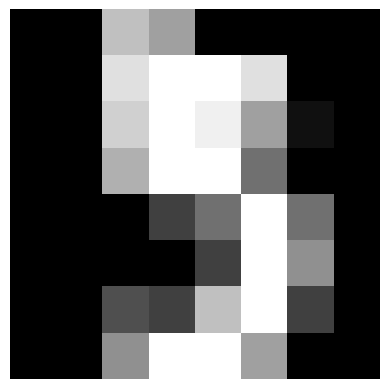

In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt

digit_img = digit.reshape(8, 8)

plt.imshow(digit_img, cmap="gray")
plt.axis("off")
plt.show()

In [84]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=SEED)
sgd_clf.fit(X_train, y_train)

sgd_clf.predict([digit])

array([0])

In [41]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[1217,    7],
       [   8,  115]], dtype=int64)

### 모델 예측

- Dummy 예측

In [44]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
pred_dummy = dummy.predict(X_valid)

- 모델 예측

In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=SEED)
sgd_clf.fit(X_train, y_train)

pred_clf = sgd_clf.predict(X_valid)

### Accuracy(정확도)

> 정답을 맞춘 횟수의 비율

Accuracy의 한계
- 오류 중에서 FN을 줄이는 것이 더 중요한 경우  
- 오류 중에서 FP를 줄이는 것이 더 중요한 경우
- 정확도는 위 2가지 오류에 대해 정도의 차이를 구분할 수 없기 때문에 적절한 성능지표가 될 수 없다.
- 음성(0)이 양성(1)보다 훨씬 많은 경우 모든 예측을 음성(0)으로만 놓아도 높은 정확도가 나오기 때문에 적절한 성능지표로는 사용할 수 없다.

In [85]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = accuracy_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.8688888888888889
model: 0.9866666666666667


### Precision(정밀도)

> 긍정(1) 예측을 맞춘 횟수 / 긍정(1) 예측을 한 횟수  
> FP를 줄이는 것이 목표일 때 사용

현재 Dummy는 모든 예측을 부정(0)으로만 했기 때문에 정확도는 높았지만, 정밀도는 0을 기록한 것을 볼 수 있다.

In [86]:
from sklearn.metrics import precision_score
score = precision_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = precision_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 1.0


c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sensitivity(민감도) = Recall(재현도) = TPR

> 민감도는 TPR(True Positive Rate) 또는 Recall이라고도 한다.  
> 긍정(1) 예측을 맞춘 횟수 / 긍정(1) 예측을 맞춘 횟수 + 긍정(1) 데이터를 부정(0)으로 틀린 횟수  
> FN을 줄이는 것이 목표일 때 사용

In [87]:
from sklearn.metrics import recall_score
score = recall_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = recall_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.8983050847457628


### F1 Score

> 분류 모델에서 사용되는 머신러닝 Metric  
> Precision과 Recall로 F1 Score가 구성되기 때문에 보통 Precision과 Recall의 중간에 위치한다.  
> 불균형한 데이터가 잘 동작하는지에 대한 평가 지표로 활용

$$
F1Score = { 2 * Presicion * Recall \over Precision + Recall }
$$

In [88]:
from sklearn.metrics import f1_score
score = f1_score(y_valid, pred_dummy)
print(f"dummy: {score}")
score = f1_score(y_valid, pred_clf)
print(f"model: {score}")

dummy: 0.0
model: 0.9464285714285715


In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, pred_dummy))
print('-'*100)
print(classification_report(y_valid, pred_clf))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       391
           1       0.00      0.00      0.00        59

    accuracy                           0.87       450
   macro avg       0.43      0.50      0.46       450
weighted avg       0.75      0.87      0.81       450

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       391
           1       1.00      0.90      0.95        59

    accuracy                           0.99       450
   macro avg       0.99      0.95      0.97       450
weighted avg       0.99      0.99      0.99       450



c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division`

### Precision-Recall Trade-off

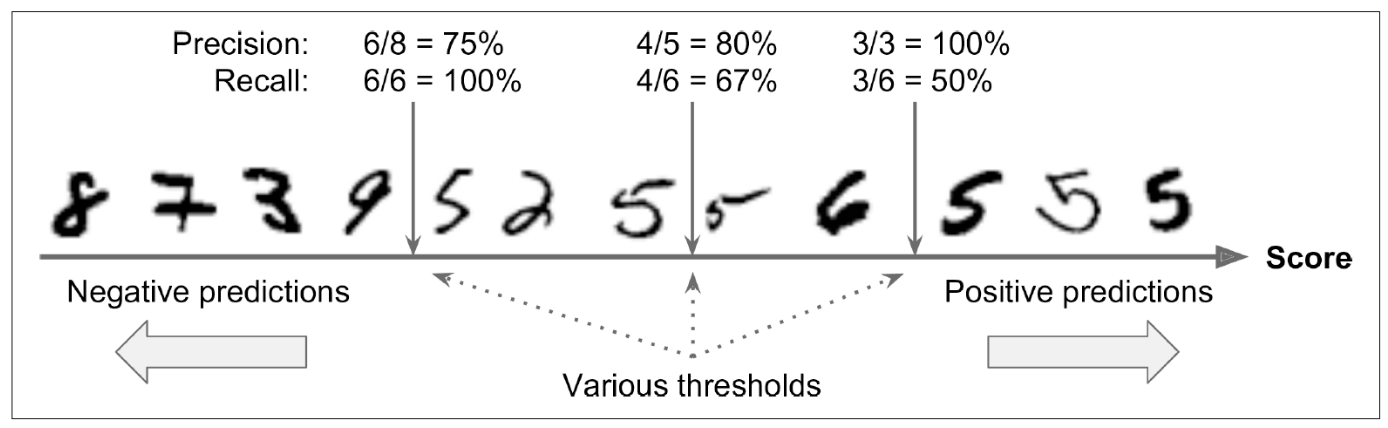

#### 임계값(Thresholds)
- 모델은 분류에서 확률(0~1) 또는 음수에서 양수 사이에 실수를 예측값으로 출력
- 사이킷런에서는 `predict_proba()`, `dicision_funtion()` 제공
  - `predict_proba()`: 0.5 이상이면 1로 예측
  - `dicision_funtion()`: 0 이상이면 1로 예측

In [91]:
pred_proba = sgd_clf.decision_function(X_valid)

In [95]:
pred_proba

array([-2551.78950827, -1640.77400599, -2767.59228093, -2125.98878438,
       -3220.36835141, -1425.99561358,   815.68983339, -3870.84981012,
        1226.8077737 , -3188.61256366, -4607.72066992, -2274.52392062,
       -3413.97621865, -2789.10426618, -4501.86804409, -5115.47181381,
       -3129.19850916, -4368.6986116 , -3840.80132279, -3884.16675337,
       -4337.28428393, -2965.98058934, -2813.00647201, -4413.42988251,
         117.06250293, -2435.69307995, -3195.44176532,   524.42438232,
       -2111.3060008 , -3657.77871813, -2171.40297546, -4973.42441915,
       -3578.90143889, -2505.35093694, -5093.61836848, -2799.34806868,
       -1924.8687953 , -3677.92486305, -4131.72531378, -3342.95252132,
       -3244.61201732, -3308.80651299, -3143.53983266, -2366.71814312,
       -2161.15917296, -3045.54078875, -2521.74102094, -2587.30135694,
       -3733.24139655,   617.98444515,  1120.27222771, -4015.97034553,
       -3280.12386599,   706.42260673, -2215.79278629, -2659.6908946 ,
      

In [92]:
threshold = 0 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(1.0, 0.8983050847457628)

In [93]:
threshold = 30000
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

c:\Users\workspace\lectures\git_practice\data_engineering\practices\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [94]:
threshold = -30000
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.13111111111111112, 1.0)

- DecisionTreeClassifier

In [96]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_valid)

In [97]:
pred_proba = tree.predict_proba(X_valid)[:, 1]

In [98]:
threshold = 0.5 # 사이킷런의 디폴트값
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid, pred), recall_score(y_valid, pred)

(0.9811320754716981, 0.8813559322033898)

In [99]:
threshold = 0.9
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.9811320754716981, 0.8813559322033898)

In [100]:
threshold = 0.1
pred = np.where(pred_proba > threshold , 1 ,0)

precision_score(y_valid,pred) , recall_score(y_valid,pred)

(0.8813559322033898, 0.8813559322033898)

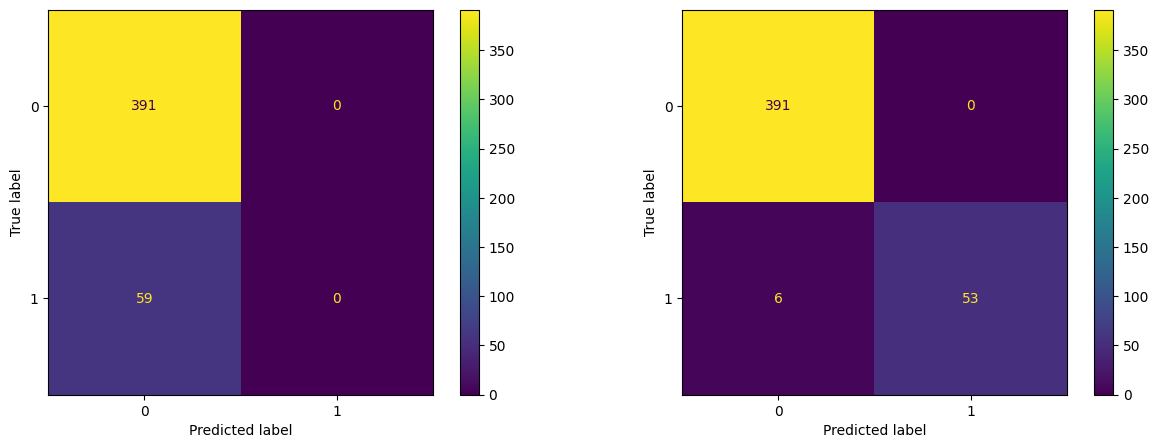

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig , ax = plt.subplots(1,2,figsize=(15,5))

cm = confusion_matrix(y_valid,pred_dummy) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[0])

cm = confusion_matrix(y_valid,pred_clf) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax = ax[1])
plt.show()

In [102]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_valid, pred_clf)

array([[391,   0],
       [  6,  53]], dtype=int64)

## ROC curve(Receiver Operating Characteristic curve)
- FPR를 X축으로, TPR을 Y축으로 정의하여 둘간의 관계를 표현한 그래프  
  - $ FPR = {FP \over FP + TN} $
  - $ TPR = {TP \over FN + TP} $

In [103]:
pred_dummy = dummy.predict_proba(X_valid)[:,1] # 1에 대한 확률만 가져오겠다.
pred_tree = tree.predict_proba(X_valid)[:,1]

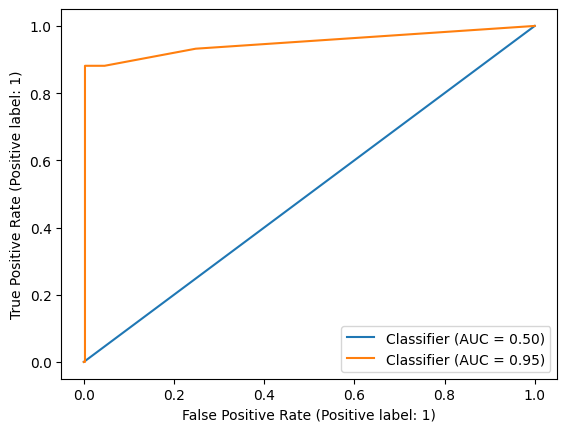

In [104]:
from sklearn.metrics import RocCurveDisplay

fig,ax = plt.subplots()
RocCurveDisplay.from_predictions(y_valid,pred_dummy,ax=ax)
RocCurveDisplay.from_predictions(y_valid,pred_tree,ax=ax)
plt.show()

### AUROC(Area Under ROC curve) (AUC)

- ROC Curve의 밑부분 면적
- 넓을수록 모델 성능이 좋다
- Threshold가 어떻게 선택되었는지와 무관하게 모델의 예측 품질을 측정할 수 있다.
    - Poor model: 0.5~0.7
    - Fair model: 0.7~0.8
    - Good model: 0.8~0.9
    - Excellent model: 0.9~1.0

In [105]:
from sklearn.metrics import roc_curve, auc 

fpr, tpr, thresholds = roc_curve(y_valid,pred_dummy)
print(f'dummy: {auc(fpr, tpr)}')
print('-'*50)
fpr, tpr, thresholds = roc_curve(y_valid,pred_tree)
print(f'model: {auc(fpr, tpr)}')

dummy: 0.5
--------------------------------------------------
model: 0.9479604664268065


## Multi Classification

In [106]:
digits = load_digits()

data = digits.data
target = digits.target

X_train, X_valid, y_train, y_valid = train_test_split(data, target, random_state=SEED)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [109]:
tree = DecisionTreeClassifier(max_depth=5, random_state=SEED)
tree.fit(X_train, y_train)
pred = tree.predict(X_valid)

In [110]:
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.32      0.32      0.32        37
           2       0.56      0.66      0.60        38
           3       0.87      0.85      0.86        46
           4       0.80      0.78      0.79        55
           5       0.73      0.19      0.30        59
           6       0.95      0.89      0.92        45
           7       0.90      0.68      0.78        41
           8       0.37      0.61      0.46        38
           9       0.52      0.85      0.65        48

    accuracy                           0.67       450
   macro avg       0.70      0.67      0.66       450
weighted avg       0.71      0.67      0.66       450



### Multi Classification 분류 방법

#### 소프트맥스 함수(Softmax Function)
  - 각 클래스에 대한 확률을 출력
  - 입력받은 값들을 0~1사이의 값들로 모두 정규화하며 출력값들의 합은 항상 1이 되는 특성을 가진 함수

$$
softmax(z) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K
$$

> 아래소스코드의 소프트맥스식은 지수함수의 특성상 값이 급격히 커져 오버플로우 오류를 조금이라도 방지하고자 입력 값 중 최대값을 이용하여 모든 입력에서 동일하게 빼고 계산하였다.   
   
> 동일하게 뺀 경우와 그렇지 않은 경우의 소프트맥스 값은 수학적으로 같다.

1.0


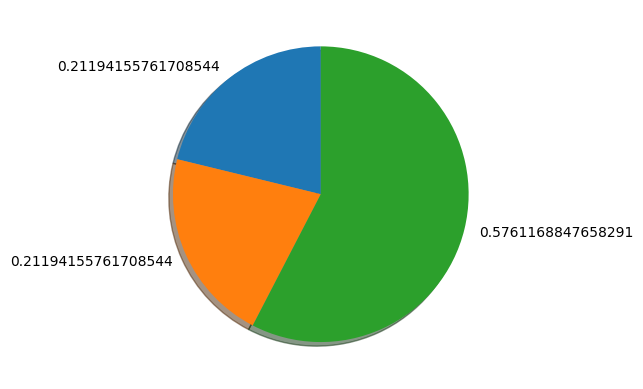

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

x = np.array([1.0,1.0,2.0])

y = softmax(x)

print(np.sum(y))

ratio = y
labels = y

plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

> - 소프트맥스 입력값: 1.0, 1.0, 2.0
> - 소프트맥스 출력값(반올림): 0.2, 0.2, 0.6

출력값이 0.25, 0.25, 0.5가 아닌 0.2, 0.2, 0.6이 나왔다. 이런 결과가 나온 이유는 바로 exp(x) 때문이다.    
소프트맥스는 1과 2가 아닌 e^1 = 2.718, e^2 = 7.389 값을 계산에 이용한다.  
즉 입력값이 커짐에 따라 기울기가 증가하며 더 큰 차이가 발생한다. 따라서 0.2, 0.2, 0.6이 나온 것이다.

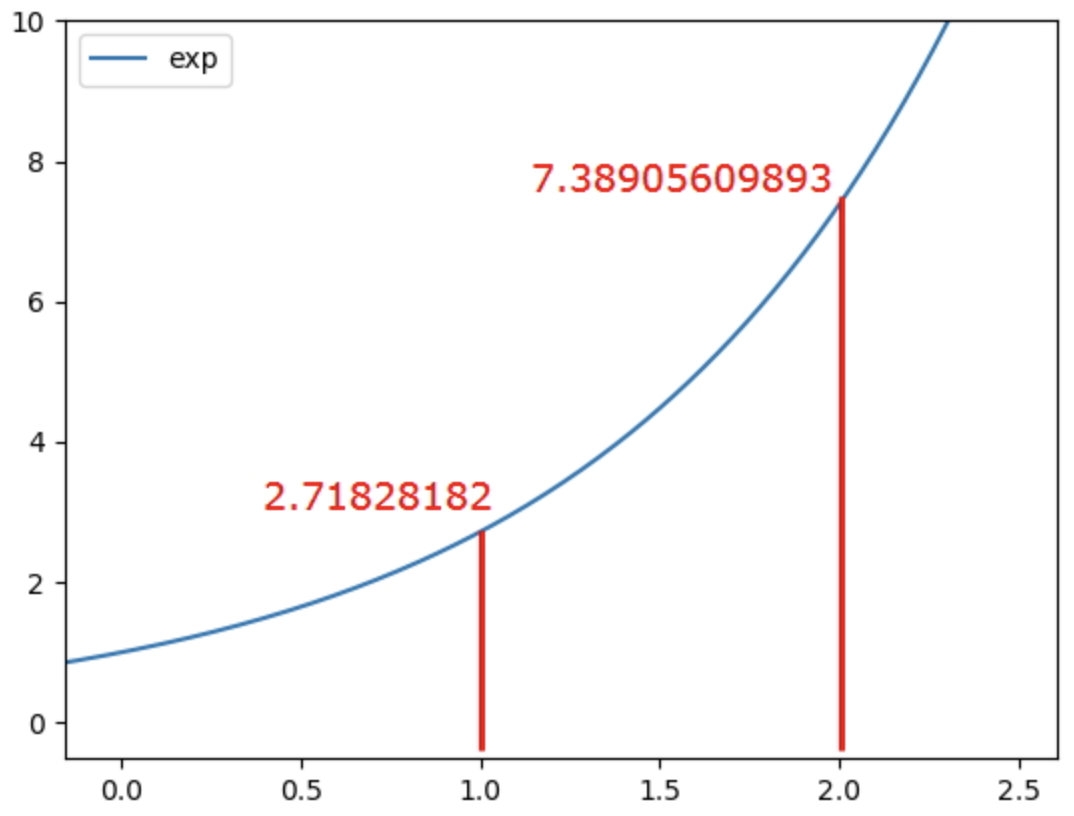

소프트맥스를 이용한 분류

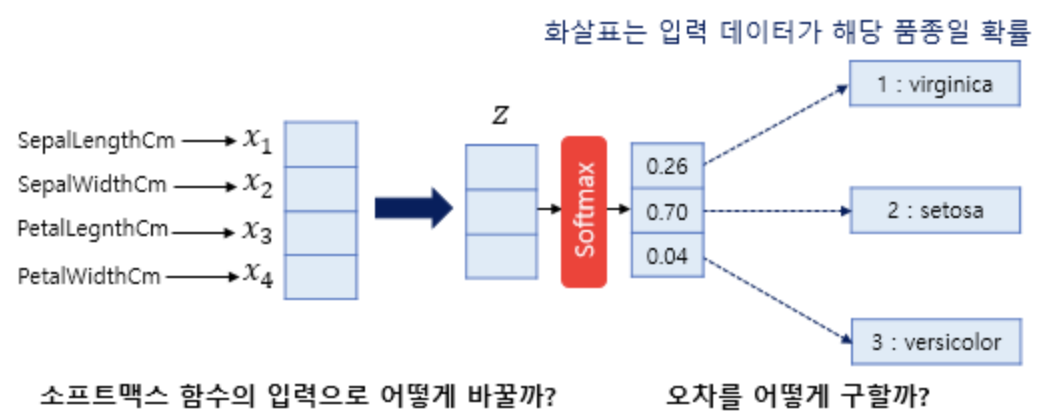

소프트맥스 출력합: 1.0


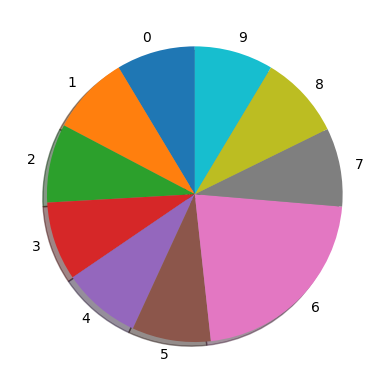

In [120]:
x = tree.predict_proba(X_valid)[0]
y = softmax(x)

print(f"소프트맥스 출력합: {np.sum(y)}")

ratio = y
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.pie(ratio, labels=labels, shadow=True, startangle=90)
plt.show()

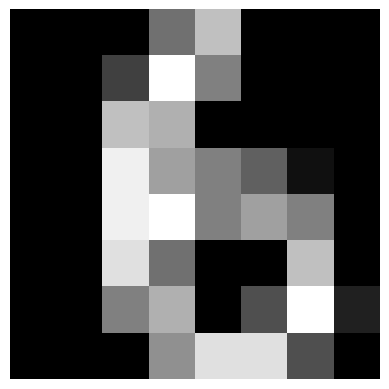

In [122]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 위에서 잡은 데이터 찍어보기
digit_img = X_valid[0].reshape(8, 8)

plt.imshow(digit_img, cmap="gray")
plt.axis("off")
plt.show()

### Multi Classification 평가 방법

#### F1-Score
- micro
> 전체 클래스의 대하여 TP/FP/FN 구한 뒤에 F1-Score 계산
- macro
> 각 클래스에 대하여 F1-Score 계산뒤 산술 평균
- weighted
> 각 클래스에 대하여 F1-Score 계산뒤 각 클래스가 차지하는 비율에 따라 가중평균

Binary Classification은 AUC, Multi Classification은 F1 Score가 가장 좋은 평가를 보여준다.

In [123]:
f1_score(y_valid,pred,average="micro")

0.6688888888888889

In [124]:
f1_score(y_valid,pred,average="macro")

0.6620047429878985

In [125]:
f1_score(y_valid,pred,average="weighted")

0.6616398619763888

#### logloss
- 모델이 예측한 확률 값을 반영해서 평가한다.
- 0에 가까울 수록 좋은 모델
- 정답에 해당하는 확률값들을 음의 로그함수에 넣어서 나온값들을 평균내서 평가

음의 로그함수
- f(1) = 0이 된다. 0에 가까운 값을 넣을 수록 큰값이 나온다.

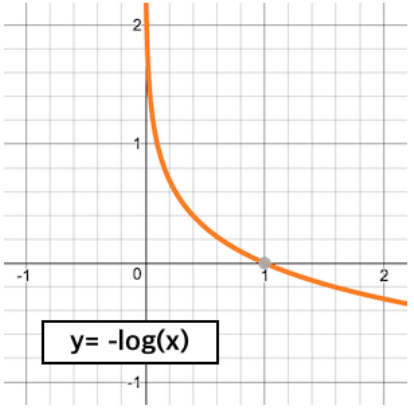

In [128]:
from sklearn.metrics import log_loss

pred = tree.predict_proba(X_valid)
log_loss(y_valid,pred)

2.1647396191436967